# Random Forest model

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
import os.path

from utilities import *

if os.path.isfile("random_state.txt"):
    with open("random_state.txt", "r") as f:
        random_state = int(f.read())
        print(f"Using random state {random_state}")

    np.random.seed(random_state)

test_size = 0.2

Using random state 69420


In [15]:
data = pd.read_csv('data/train_processed.csv')
target = "Machine failure"

In [16]:
X = data.drop(columns=[target], axis=1)
y = data[target]

In [17]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=test_size, random_state=random_state)

print(f"Train size: {len(Xtr)}")
print(f"Test size: {len(Xte)}")

Train size: 108891
Test size: 27223


### Baseline

In [18]:
base_rf = RandomForestClassifier(random_state=random_state)
base_rf.fit(Xtr, ytr)

RandomForestClassifier(random_state=69420)

In [19]:
ypred = base_rf.predict(Xte)
rep = classification_report(yte, ypred)

In [20]:
print("Feature importances:")
for i, imp in enumerate(base_rf.feature_importances_):
    print(f"\t{X.columns[i]}: {imp:.3f}")

Feature importances:
	id: 0.158
	Air temperature [K]: 0.134
	Process temperature [K]: 0.123
	Rotational speed [rpm]: 0.199
	Torque [Nm]: 0.244
	Tool wear [min]: 0.143


In [21]:
base_depth = max([estimator.get_depth() for estimator in base_rf.estimators_])
print(f"Tree depth: {base_depth}")

Tree depth: 35


In [22]:
cm = confusion_matrix(yte, ypred, labels=base_rf.classes_, normalize="true")

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26841
           1       0.63      0.31      0.42       382

    accuracy                           0.99     27223
   macro avg       0.81      0.65      0.70     27223
weighted avg       0.99      0.99      0.99     27223

Best parameters:
	bootstrap: True
	ccp_alpha: 0.0
	class_weight: None
	criterion: gini
	max_depth: None
	max_features: sqrt
	max_leaf_nodes: None
	max_samples: None
	min_impurity_decrease: 0.0
	min_samples_leaf: 1
	min_samples_split: 2
	min_weight_fraction_leaf: 0.0
	monotonic_cst: None
	n_estimators: 100
	n_jobs: None
	oob_score: False
	random_state: 69420
	verbose: 0
	warm_start: False

Feature importances:
	id: 0.158
	Air temperature [K]: 0.134
	Process temperature [K]: 0.123
	Rotational speed [rpm]: 0.199
	Torque [Nm]: 0.244
	Tool wear [min]: 0.143


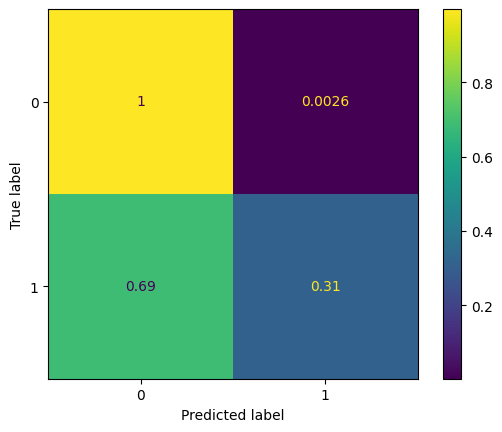

In [23]:
print_model_results(base_rf, rep, cm, X.columns)

### Grid Search

In [24]:
accu_recall = make_scorer(accu_recall_scorer, min_accuracy=0.9)

In [25]:
# Set the parameters by cross-validation
params = [{'max_depth': [*range(4,base_depth+1)],
           'n_estimators':[*range(10,60,10)]}]

scores = [accu_recall]

results = grid_search(params, scores, base_rf, Xtr, ytr, Xte, yte)

Tuning hyperparameters for: make_scorer(accu_recall_scorer, response_method='predict', min_accuracy=0.9)...

KeyboardInterrupt: 